<a href="https://colab.research.google.com/github/rajathAgalkote/MovieRecommendationSystem_EDA/blob/main/Rajathadri_MovieRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

## **Project Type** : 
## **Contribution** : Rajathadri A S
<br>

## **Datasets Used** : 
## 1. kaggle datasets download -d tmdb/tmdb-movie-metadata
## 2. kaggle datasets download -d rounakbanik/the-movies-dataset

## **Project Objective :**


## **Project Summary :**

## **Problem Statement :**

## **Coding :**

In [58]:
# Importing Libraries

import numpy as np
import pandas as pd
import io
from ast import literal_eval

from numpy import math
from numpy import loadtxt

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import warnings
warnings.simplefilter('ignore')

In [9]:
# Upload required csv files

from google.colab import files
uploaded01 = files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits (1).csv


In [10]:
uploaded02 = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [11]:
# Initializing dataframes

df1 = pd.read_csv(io.BytesIO(uploaded01['tmdb_5000_credits.csv']))

df2 = pd.read_csv(io.BytesIO(uploaded02['tmdb_5000_movies.csv']))

## Feature Description :

<br>

**The first dataset (df1) contains the following features:-**

<br>

movie_id - A unique identifier for each movie.

cast - The name of lead and supporting actors.

crew - The name of Director, Editor, Composer, Writer etc.

<br>

**The second dataset (df2) has the following features:-**

<br>

budget - The budget in which the movie was made.

genre - The genre of the movie, Action, Comedy ,Thriller etc.

homepage - A link to the homepage of the movie.

id - This is infact the movie_id as in the first dataset.

keywords - The keywords or tags related to the movie.

original_language - The language in which the movie was made.

original_title - The title of the movie before translation or 
adaptation.

overview - A brief description of the movie.

popularity - A numeric quantity specifying the movie popularity.

production_companies - The production house of the movie.

production_countries - The country in which it was produced.

release_date - The date on which it was released.

revenue - The worldwide revenue generated by the movie.

runtime - The running time of the movie in minutes.

status - "Released" or "Rumored".

tagline - Movie's tagline.

title - Title of the movie.

vote_average - average ratings the movie recieved.

vote_count - the count of votes recieved.

In [12]:
# Dataframes first view

df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [14]:
df1.shape

(4803, 4)

In [15]:
df2.shape

(4803, 20)

Both dataframes df1 and df2 have equal number of entries and are inter-related to each other. Let us merger the dataframes on 'movie_id' and 'id' column.

In [16]:
# Rename 'movie_id' column in df1 to match 'id' column in df2
df1 = df1.rename(columns={'movie_id':'id'}) 

df = df2.merge(df1, on=('id','title'))

In [17]:
df.shape

(4803, 22)

In [ ]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

Finally, let us check our dataframe for duplicate and NULL values

In [ ]:
# Checking for Duplicate Values

len(df[df.duplicated()])

0

In [ ]:
# Checking for NULL values

print(df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


Total entries = 4803

Null in 'homepage' = 3091

Null in 'overview' = 3

Null in 'release_date' = 1

Null in 'runtime' = 2

Null in 'tagline' = 844

Let's plot a seaborn heatmap to understand NULL value distribution

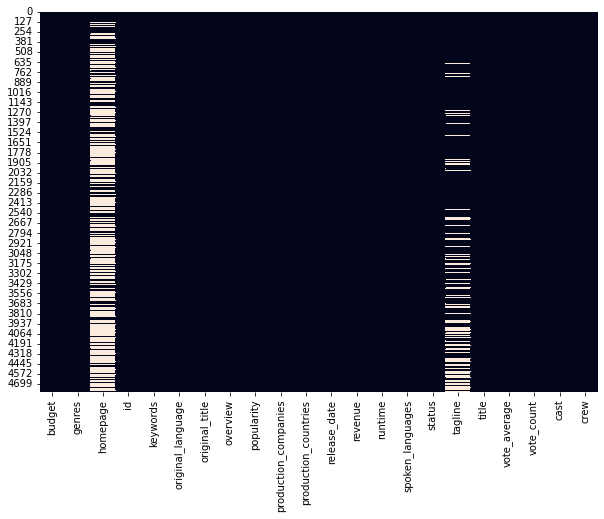

In [18]:
# Visualizing the missing values to confirm

plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar=False)

Checking Skewness of the numeric features

In [19]:
numeric_features = df.describe().columns
numeric_features

Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

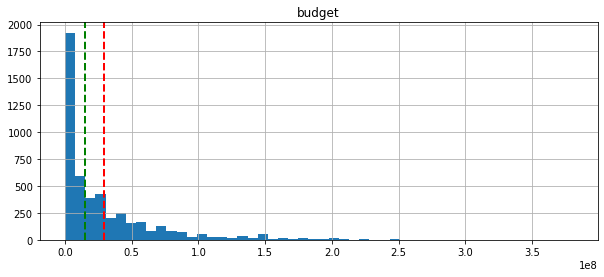

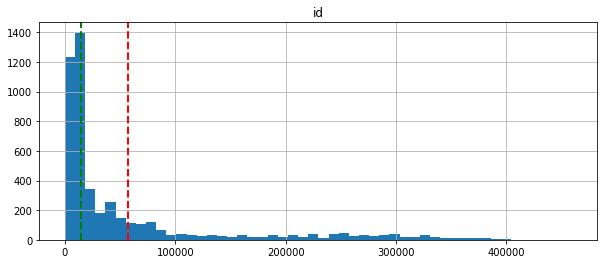

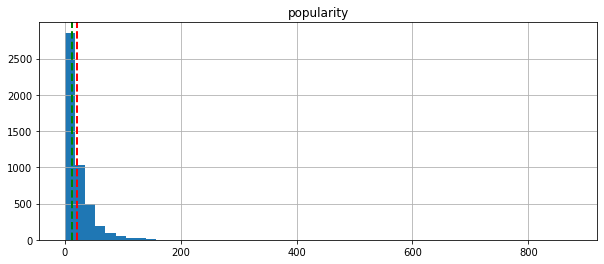

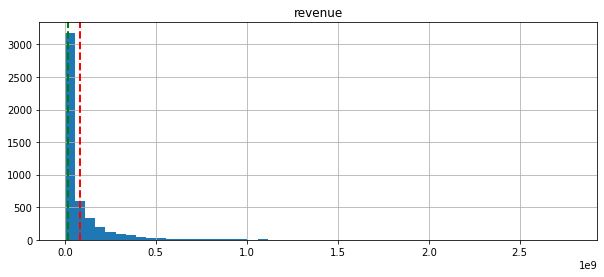

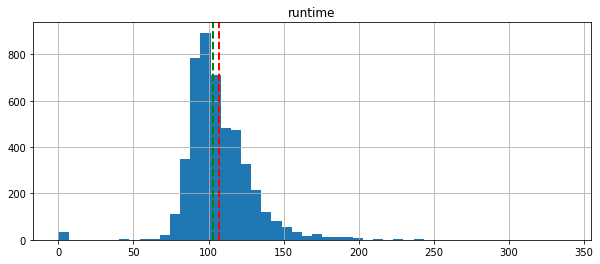

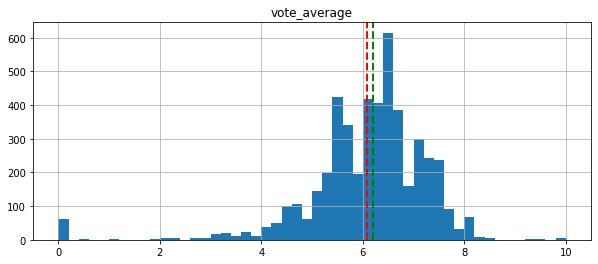

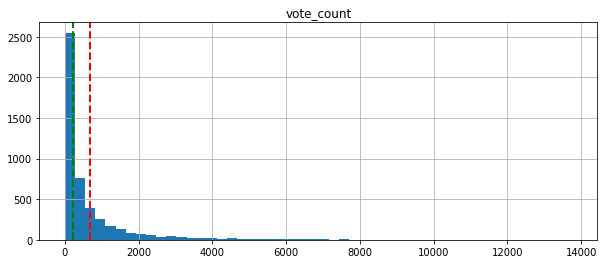

In [20]:
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(10,4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Independent features have "Data No Skew" with normal distribution.

Hence, a Linear Regression model is a possiblity.

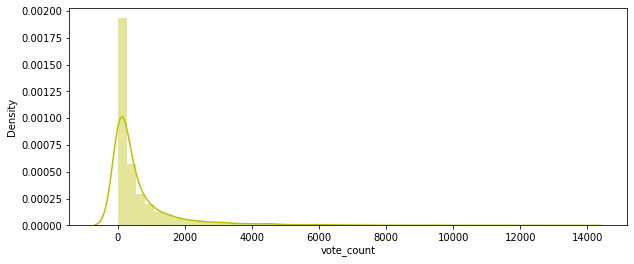

In [21]:
# Dependent variable 'vote_count'
plt.figure(figsize=(10,4))
sns.distplot(df['vote_count'], color="y")

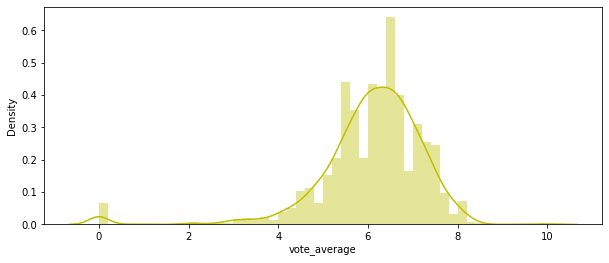

In [22]:
# Dependent variable 'vote_count'
plt.figure(figsize=(10,4))
sns.distplot(df['vote_average'], color="y")

Both Vote_count and vote_average are normally distributed and have "Data No Skew"

Recommendation model 01 :
## "The top rated movies of all time"

Let us define a weighted feature to rate each movie.

The existing features(vote_count & vote_average) are biased variables.

We'll be using IMDB defined weighted rating (WR) feature.

In [23]:
# Defining the dependent variables c and m

c = df['vote_average'].mean()
c

6.092171559442016

In [24]:
m= df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [25]:
# Filtering Out movies that qualify IMDB's WR

qualified_movies = df.copy().loc[df['vote_count'] >= m]
qualified_movies.shape

(481, 22)

In [26]:
# Define the function WR

def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * c)

In [27]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
qualified_movies['score'] = qualified_movies.apply(weighted_rating, axis=1)

In [28]:
#Sort movies based on score calculated above
q_movies = qualified_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Recommendation - 01 completed.

Common recommendation for all users.



---



Recommendation model 02 :
## "Trending Movies"

In [29]:
# I am setting the default cmap to 'plasma'

plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams["figure.autolayout"] = True

Text(0.33, 1, 'Most Popular Movies')

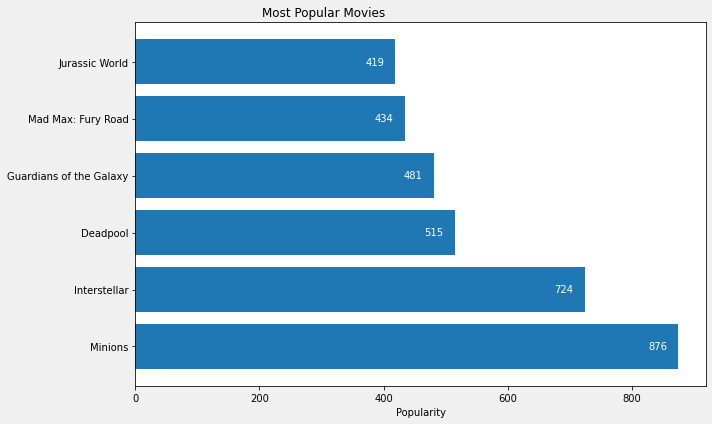

In [30]:
popular = df.sort_values('popularity', ascending=False)

# Subplots and Colormap
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.viridis()

# Creating bars 
bar = ax.barh(popular['title'].head(6), popular['popularity'].head(6))
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Setting title format
title = plt.title("Popular Movies", pad=20, fontsize=18)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

# Bar labels formatting - Printing counts on the bar

rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords='offset points',
        va='center',ha=ha,color = 'white')

plt.xlabel("Popularity")
plt.title("Most Popular Movies")

Recommendation - 02 completed.

Common recommendation for all users.



---



Recommendation model 03 :
## "Similar to Previous Views"

This recommendation is unique to all viewers based on their previously viewed content.

To do this, we will define a 'content_score' for all movies. The movies with a similar content_score will be recommended to the users.

In [31]:
# Exploring 'Overview' feature

df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [32]:
#  Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [33]:
#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

In [34]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [36]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [44]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [45]:
# Defining a function that returns similar content based on input movie title

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

Let us verify the defined function by taking any random movie

In [46]:
get_recommendations('Deadpool')

873                                   Shaft
2375                       Midnight Special
3733                            Night Watch
473                           Mars Attacks!
30                             Spider-Man 2
4664                                Bronson
1110                  Underworld: Evolution
50      Prince of Persia: The Sands of Time
5                              Spider-Man 3
3742                                 Maggie
Name: title, dtype: object

Kindly note that the input to the above function is 'Case Sensitive'



---



Recommendation model 04 :
## "Recommended Directors, Actors and Genre"

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie.

In [47]:

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

ValueError: ignored

In [48]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [49]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [50]:
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [52]:
df[['title', 'cast', 'director', 'keywords', 'genres']].head(6)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco]",Sam Raimi,"[dual identity, amnesia, sandstorm]","[Fantasy, Action, Adventure]"


The recommendation needs to be more precise.

In [53]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [54]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [55]:
# Defining the input to the vectorizer

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df['soup'] = df.apply(create_soup, axis=1)

In [59]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [60]:
# Reset index of our main DataFrame
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

In [61]:
get_recommendations('Deadpool', cosine_sim2)

1932                                  Sheena
503     The Adventures of Rocky & Bullwinkle
1721                      30 Minutes or Less
4401                     The Helix... Loaded
1324                        Virgin Territory
2122                              Epic Movie
3318                      Witless Protection
4004                         Silver Medalist
518                         Inspector Gadget
167                                   Sahara
Name: title, dtype: object



---

